<a href="https://colab.research.google.com/github/achintya09/PRODIGY_DS_03/blob/main/Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BANK PRODUCT PURCHASE PREDICTION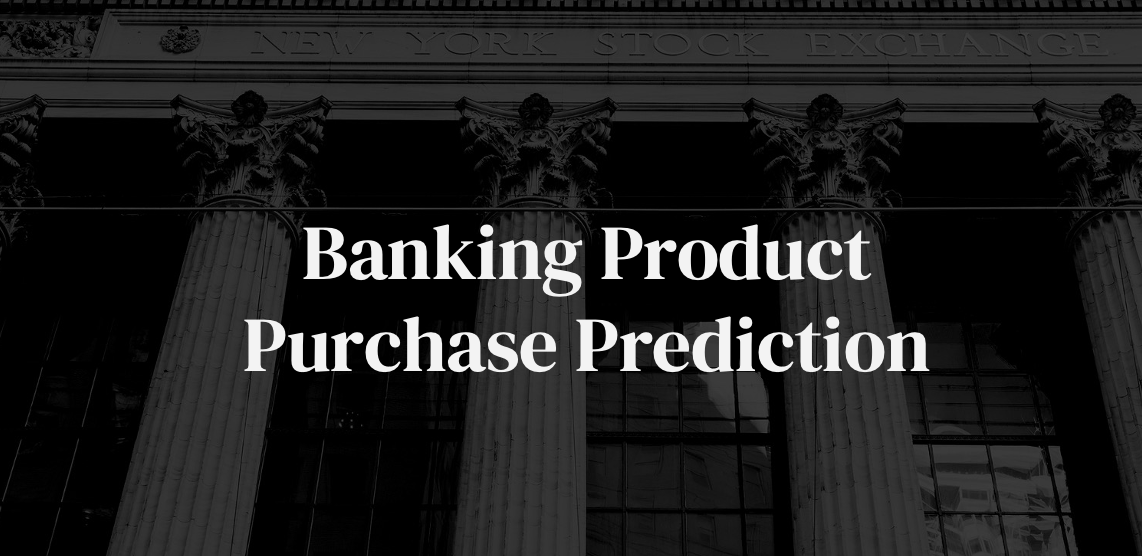

##PROJECT INTRODUCTION
I am going to analyse the data and build a decision tree regression model to predict whether a customer will purchase a product or not. I will match the predicted result with the original result and find out accuracy of the model.

##PROBLEM STATEMENT
* To develop a model that can predict the result of respective customer.
* To evaluate and show the accuracy of the prediction.
* To visualise the heatmap with all the features.

## ADDRESSING THE PROBLEM
 Here I will use matplotlib and seaborne library to visualise and decision tree regressor for creating regression model.

# GETTING STARTED

### IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### IMPORTING DATASET

In [ ]:
dataset = pd.read_csv("bank-full.csv")

In [ ]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### REMOVING THE NULL VALUES & DUPLICATE ROWS FROM THE DATASET

In [ ]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.shape

(45211, 17)

In [ ]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### SHOWING THE HEATMAP

<ipython-input-170-a7d6d403bc43>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


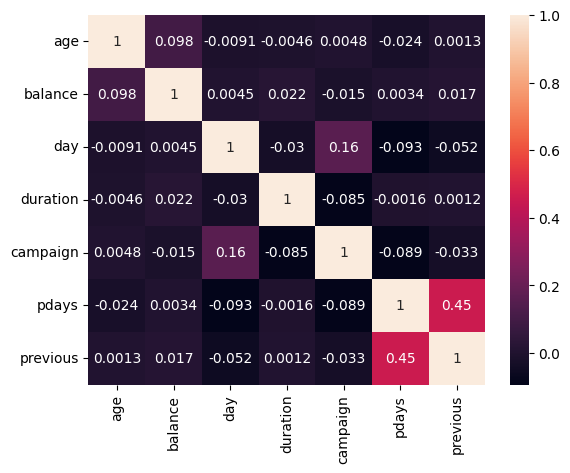

In [ ]:
# prompt: make a heat map with the dataset

import seaborn as sns
sns.heatmap(dataset.corr(), annot=True)
plt.show()


### FINDING THE MIN AND MAX VALUES OF EACH COLUMN

In [ ]:
# prompt: min and max of the values of the dataset
dataset.min()



age                18
job            admin.
marital      divorced
education     primary
default            no
balance         -8019
housing            no
loan               no
contact      cellular
day                 1
month             apr
duration            0
campaign            1
pdays              -1
previous            0
poutcome      failure
y                  no
dtype: object

In [ ]:
dataset.max()

age               95
job          unknown
marital       single
education    unknown
default          yes
balance       102127
housing          yes
loan             yes
contact      unknown
day               31
month            sep
duration        4918
campaign          63
pdays            871
previous         275
poutcome     unknown
y                yes
dtype: object

### FINDING THE NUMBER OF VALUES OF EACH CATEGORY FROM SEPARATE COLUMN

In [ ]:
print("Job Results:")
print(dataset['job'].value_counts())

print("Marital Results:")
print(dataset['marital'].value_counts())

print("Education Results:")
print(dataset['education'].value_counts())

print("default results:")
print(dataset['default'].value_counts())

print("housing results:")
print(dataset['housing'].value_counts())

print("loan results:")
print(dataset['loan'].value_counts())

print("contact results:")
print(dataset['contact'].value_counts())

print("months:")
print(dataset['month'].value_counts())

print("poutcomes:")
print(dataset['poutcome'].value_counts())

print("final outcomes:")
print(dataset['y'].value_counts())

Job Results:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
Marital Results:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
Education Results:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
default results:
no     44396
yes      815
Name: default, dtype: int64
housing results:
yes    25130
no     20081
Name: housing, dtype: int64
loan results:
no     37967
yes     7244
Name: loan, dtype: int64
contact results:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
months:
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Na

### ENOCODING THE CATEGORICAL VALUES WITH ONE HOT ENCODER

In [ ]:
# prompt: job, marital, education, default, housing, loan,contact,  month, poutcome encode these with onehot encoder and keep other collumns as it is

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
column_transformer = ColumnTransformer([
    ('one_hot_encoder', one_hot_encoder, ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
], remainder='passthrough')
features = column_transformer.fit_transform(dataset)


In [ ]:
# prompt: transform features into panda

df = pd.DataFrame(features)


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,58,2143,5,261,1,-1,0,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,44,29,5,151,1,-1,0,no
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,33,2,5,76,1,-1,0,no
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,47,1506,5,92,1,-1,0,no
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,33,1,5,198,1,-1,0,no


### FINDING THE NUMBER OF RESULT "yes" & "no"

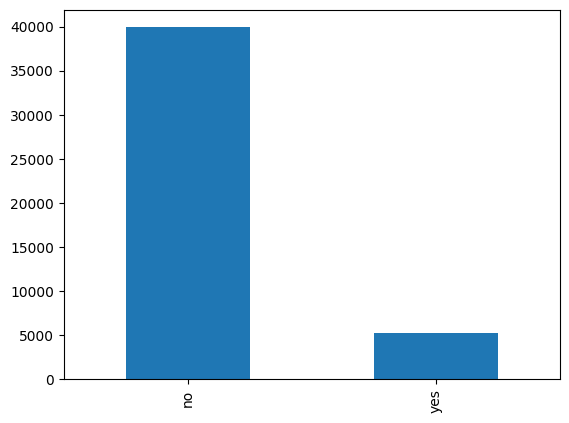

In [ ]:
# prompt: make a bar chart with 51 column

df.iloc[:, 51].value_counts().plot(kind = 'bar')
plt.show()


### SPLITTING THE df INTO FEATURE COLUMN AND  TARGET COLUMN

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X.shape

(45211, 51)

In [ ]:
y.shape

(45211,)

### BALANCING THE DATASET USING IMBLEARN

In [ ]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
X_resampled.shape

(79844, 51)

In [ ]:
y_resampled.shape

(79844,)

### SPLITTING THE DATA INTO TRAIN SET AND TEST SET

In [ ]:
# prompt: split it in train test

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.10, random_state = 42)


In [ ]:
X_train.shape

(71859, 51)

In [ ]:
X_test.shape

(7985, 51)

In [ ]:
y_train.shape

(71859,)

In [ ]:
y_test.shape

(7985,)

### TRAINIGN THE TRAIN SET WITH THE DECISION TREE CLASSIFIER

In [ ]:
# prompt: train the train set with the decision tree classifier

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

### PREDICTING THE RESULTS OF THE TEST SET BY THE MODEL CREATED AND COMPARING WITH THE ORIGINAL RESULT

In [ ]:
# prompt: predict the results of test set by the model and print horizontally with the y_test

y_pred = classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), axis=1))


[['yes' 'yes']
 ['yes' 'yes']
 ['yes' 'yes']
 ...
 ['yes' 'yes']
 ['no' 'no']
 ['yes' 'yes']]


### SHOWING THE CONFUSION MATRIX TO FIND CORRECT PREDICTIONS

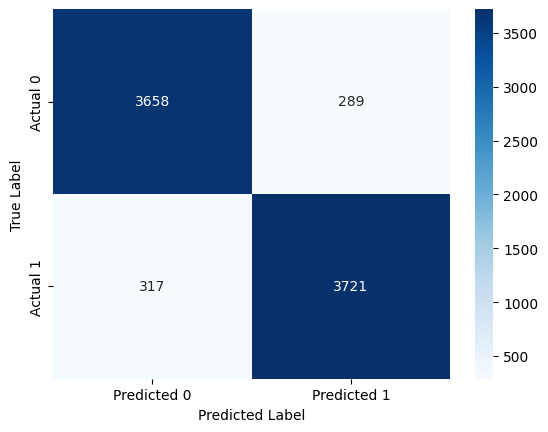

              precision    recall  f1-score   support

          no       0.92      0.93      0.92      3947
         yes       0.93      0.92      0.92      4038

    accuracy                           0.92      7985
   macro avg       0.92      0.92      0.92      7985
weighted avg       0.92      0.92      0.92      7985



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report



# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print classification report for more detailed metrics
print(classification_report(y_test, y_pred))


### FINDING ACCURACY OF THE MODEL WITH VARIOUS METRICS

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,  recall_score, f1_score


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision
precision = precision_score(y_test, y_pred, pos_label='yes')
print('Precision:', precision)

# Recall
recall = recall_score(y_test, y_pred, pos_label='yes')
print('Recall:', recall)

# F1 score
f1_score = f1_score(y_test, y_pred, pos_label='yes')
print('F1 score:', f1_score)


Accuracy: 0.9241077019411397
Precision: 0.9279301745635911
Recall: 0.921495789995047
F1 score: 0.9247017892644136
